<a href="https://colab.research.google.com/github/ShivikaPrasanna/brain_cancer_gene_expression/blob/main/Brain_cancer_gene_expression_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Brain_GSE50161.csv')

In [ ]:
Target = {k: v for k, v in zip(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma'], list(range(len(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']))))}
Target
for i in range(data.shape[0]):
    data.iloc[i, 1] = Target[data.iloc[i, 1]]

In [ ]:
# Separate the data and labels
labels = data.pop('type')
data = data.to_numpy().astype(np.float32)
labels = labels.to_numpy().flatten().astype(np.float32)

In [ ]:
# Standardize the features
sc = StandardScaler()
data = sc.fit_transform(data)

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 16)                874832    
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 874,849
Trainable params: 874,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/50
4/4 [==============================] - 0s 40ms/step - loss: -12783.1592 - accuracy: 0.5897 - lr: 0.0010
Epoch 2/50
4/4 [==============================] - 0s 69ms/step - loss: -13089.4775 - accuracy: 0.5214 - lr: 0.0010
Epoch 3/50
4/4 [==============================] - 0s 39ms/step - loss: -13419.6299 - accuracy: 0.5299 - lr: 0.0010
Epoch 4/50
4/4 [==============================] - 0s 26ms/step - loss: -13723.9297 - accuracy: 0.5641 - lr: 0.0010
Epoch 5/50
4/4 [==============================] - 0s 60ms/step - loss: -14082.4883 - accuracy: 0.5556 - lr: 0.0010
Epoch 6/50
4/4 [==============================] - 0s 44ms/step - loss: -14382.0117 - accuracy: 0.5641 - lr: 0.0010
Epoch 7/50
4/4 [==============================] - 0s 33ms/step - loss: -14721.3662 - accuracy: 0.5641 - lr: 0.0010
Epoch 8/50
4/4 [==============================] - 0s 69ms/step - loss: -15067.3896 - accuracy: 0.5470 - lr: 0.0010
Epoch 9/50
4/4 [==============================] - 0s 47ms/step - loss: -15418.15

In [ ]:
history.history

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="val accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of Neural Network Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

In [ ]:
# Evaluate the model training
model.load('/content/.mdl_wts.hdf5')
score, acc = model.evaluate(X_test, y_test, batch_size=32, verbose=2)
print("Accuracy: ", acc)

1/1 - 0s - loss: -2.2074e+04 - accuracy: 0.6154 - 25ms/epoch - 25ms/step
Accuracy:  0.6153846383094788


Benchmark

In [ ]:
import math, os, pathlib
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dfMerge = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Brain_GSE50161.csv')
dfMerge

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,pilocytic_astrocytoma,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,pilocytic_astrocytoma,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,pilocytic_astrocytoma,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,pilocytic_astrocytoma,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [ ]:
dfMerge.type.unique()

array(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal',
       'pilocytic_astrocytoma'], dtype=object)

In [ ]:
Target = {k: v for k, v in zip(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma'], list(range(len(['ependymoma', 'glioblastoma', 'medulloblastoma', 'normal', 'pilocytic_astrocytoma']))))}
Target

{'ependymoma': 0,
 'glioblastoma': 1,
 'medulloblastoma': 2,
 'normal': 3,
 'pilocytic_astrocytoma': 4}

In [ ]:
for i in range(dfMerge.shape[0]):
    dfMerge.iloc[i, 1] = Target[dfMerge.iloc[i, 1]]

In [ ]:
dfMerge

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,0,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,0,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,0,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,0,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,0,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,959,4,12.658228,8.843270,7.672655,9.125912,5.495477,8.603892,7.747514,5.828978,...,13.170441,12.676080,14.124837,13.996436,4.913579,4.399176,3.878855,3.680103,4.726784,4.564637
126,960,4,12.812823,8.510550,8.729699,9.104402,3.967228,7.719089,7.092496,6.504812,...,13.040267,12.403316,13.978009,13.812916,5.189600,4.912618,3.764800,3.664920,4.628355,4.761351
127,961,4,12.706991,8.795721,7.772359,8.327273,6.329383,8.550471,6.613332,6.308945,...,12.825383,12.439265,14.328373,14.008693,4.931460,4.712895,3.913637,3.700964,4.764693,4.834952
128,962,4,12.684593,8.293938,7.228186,8.494428,6.049414,8.214729,7.287758,5.732710,...,13.116581,12.657967,14.390346,14.194904,4.871092,4.739400,3.782980,3.920363,4.665584,4.613326


In [ ]:
X = np.array(dfMerge.iloc[:, 2:])
y = np.asarray(dfMerge.iloc[:, 1]).astype('int64')

In [ ]:
X.shape

(130, 54675)

In [ ]:
y.shape

(130,)

In [ ]:
def GELU(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
    return res


class ResMLP(tf.keras.layers.Layer):
    def __init__(self, units, activation, residual_path):
        super(ResMLP, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation=activation)
        self.D2 = Dense(units, activation=activation)

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GELU(residual)
            residual = self.D4(residual)
            residual = GELU(residual)

        output = y + residual
        return output

In [ ]:
class NetWork(tf.keras.Model):
    def __init__(self, initial_filters, block_list):
        super(NetWork, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='relu')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResMLP(units=self.initial_filters, activation='relu', residual_path=True)
                else:
                    block = ResMLP(units=self.initial_filters, activation='relu', residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2
        self.D2 = Dense(5, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

In [ ]:
net = NetWork(initial_filters=1024, block_list=[3, 3, 3])

net.compile(optimizer='adam',
           loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
           metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = './checkpoint/Baseline.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    net.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path, save_weights_only=True,
                                                 save_best_only=True)

history = net.fit(X, y, epochs=50, batch_size=16, callbacks=[cp_callback])

net.summary()

file = open('./weights.txt', 'w')
for v in net.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')

file.close()

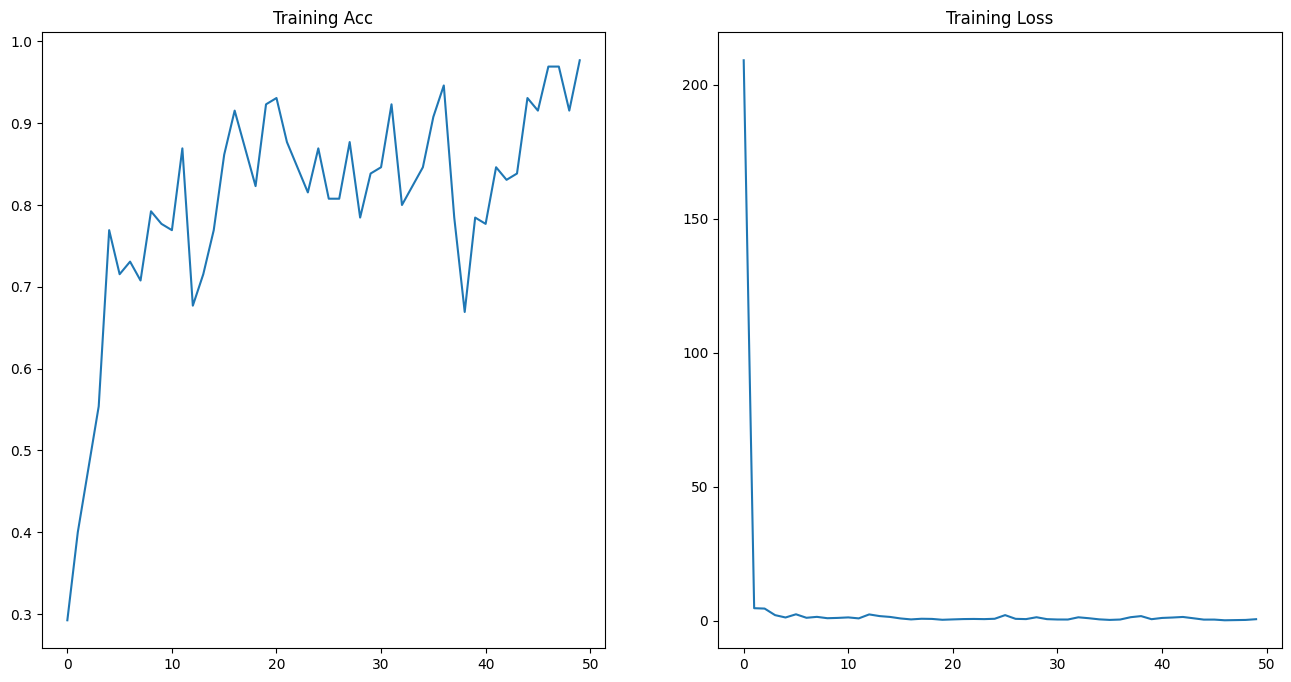

In [ ]:
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.title('Training Acc')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.title('Training Loss')

plt.show()

Attemp 2: Regular NN with fewer layers but combined classes

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Brain_GSE50161.csv')

In [ ]:
data['samples'].groupby(data['type']).count()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
normal                   13
pilocytic_astrocytoma    15
Name: samples, dtype: int64

In [ ]:
cancer_type_dict = {'ependymoma': 0, 'glioblastoma': 1, 'medulloblastoma': 2, 'pilocytic_astrocytoma': 3, 'normal': 4}
data['mapped_type'] = data['type'].replace(cancer_type_dict)
data.drop('type', axis=1, inplace=True)
data['samples'].groupby(data['mapped_type']).count()

mapped_type
0    46
1    34
2    22
3    15
4    13
Name: samples, dtype: int64

In [ ]:
# Separate the data and labels
labels = data.pop('mapped_type')
data = data.to_numpy().astype(np.float32)
labels = labels.to_numpy().flatten().astype(np.float32)

In [ ]:
# Standardize the features
sc = StandardScaler()
data = sc.fit_transform(data)

In [ ]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, verbose=0, mode='min', restore_best_weights=True)
mcp_save = tf.keras.callbacks.ModelCheckpoint('my-model-{accuracy:.2f}.hdf5', save_best_only=True, monitor='accuracy', mode='max', verbose=1)
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 16)                874832    
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 874,849
Trainable params: 874,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Parameters
batch_size = 16
epochs = 50

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/50
1/8 [==>...........................] - ETA: 6s - loss: 0.5640 - accuracy: 0.1875
Epoch 1: accuracy improved from -inf to 0.48718, saving model to my-model-0.49.hdf5
8/8 [==============================] - 1s 11ms/step - loss: -45.0024 - accuracy: 0.4872 - lr: 0.0010
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: -188.9073 - accuracy: 0.4375
Epoch 2: accuracy improved from 0.48718 to 0.56410, saving model to my-model-0.56.hdf5
8/8 [==============================] - 0s 11ms/step - loss: -236.4586 - accuracy: 0.5641 - lr: 0.0010
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: -274.8380 - accuracy: 0.6250
Epoch 3: accuracy did not improve from 0.56410
8/8 [==============================] - 0s 7ms/step - loss: -444.3402 - accuracy: 0.5385 - lr: 0.0010
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: -1036.7721 - accuracy: 0.3750
Epoch 4: accuracy improved from 0.56410 to 0.57265, saving model to my-model-0.57.hdf5
8/8 [========

In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter( y=history.history['loss'], name="loss"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="train accuracy"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of Neural Network Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

In [ ]:
# Evaluate the model training
# model.load_weights('/content/my-model-0.60.hdf5')
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=2)
print("Accuracy: ", acc)

1/1 - 0s - loss: -1.5695e+04 - accuracy: 0.6154 - 190ms/epoch - 190ms/step
Accuracy:  0.6153846383094788
